In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os 

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

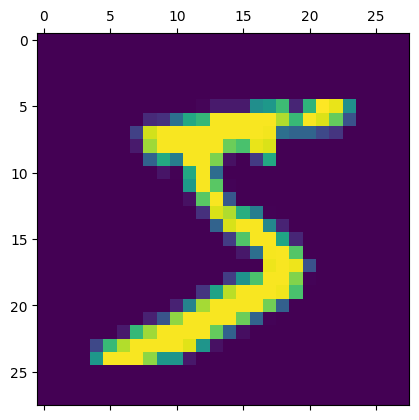

In [8]:
plt.matshow(X_train[0])

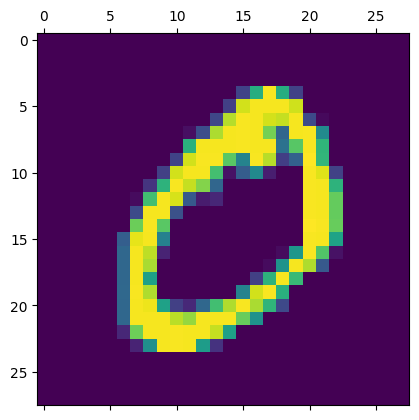

In [9]:
plt.matshow(X_train[1])

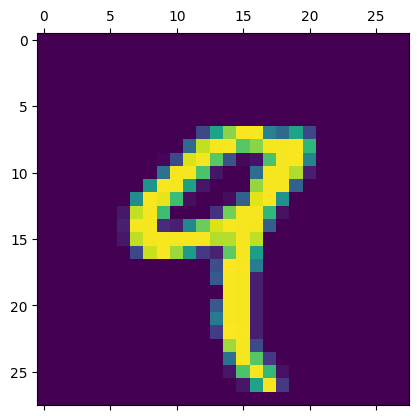

In [10]:
plt.matshow(X_train[4])

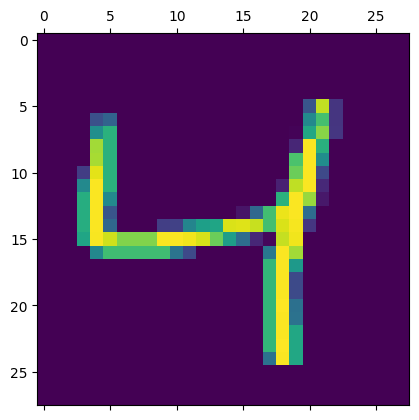

In [25]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [13]:
# Function to process and predict a single image
def process_and_predict_image(image_path, model):
    # Load the image
    input_image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    input_image_resize = cv2.resize(grayscale, (28, 28))

    # Normalize the pixel values to be in the range [0, 1]
    input_image_resize = input_image_resize / 255.0
    
    # Reshape the image for prediction
    image_reshaped = np.reshape(input_image_resize, [1, 28, 28])
    
    # Use the model to predict the digit
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)
    
    # Display the image and the predicted digit
    plt.imshow(input_image_resize, cmap='gray')
    plt.title(f'Predicted Digit: {input_pred_label}')
    plt.show()
    
    return input_pred_label



In [14]:
# Define and compile the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Train the model
X_train = X_train / 255.0  # Normalize pixel values
history1 = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

# Save the model
model.save('model/')



Epoch 1/15
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2924 - accuracy: 0.9141 - val_loss: 0.1434 - val_accuracy: 0.9581
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1204 - accuracy: 0.9633 - val_loss: 0.1112 - val_accuracy: 0.9680
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0851 - accuracy: 0.9739 - val_loss: 0.1086 - val_accuracy: 0.9684
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.1081 - val_accuracy: 0.9697
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.1040 - val_accuracy: 0.9719
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.1038 - val_accuracy: 0.9707
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.1045 - val_accuracy:

INFO:tensorflow:Assets written to: model/assets


In [16]:
image_directory = 'images/'  # 'images' folder in the main directory
image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith(('.png', '.jpg','.jpeg'))]

# Load your model
loaded_model = keras.models.load_model('model/')  

1/1 [==============================] - 0s 157ms/step


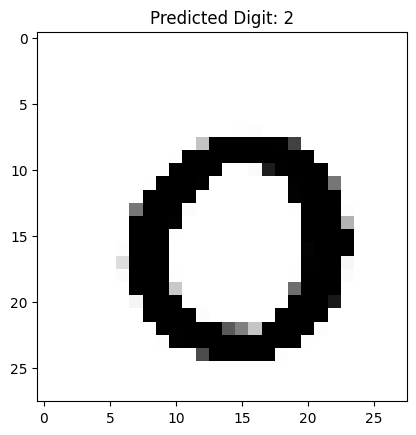

1/1 [==============================] - 0s 34ms/step


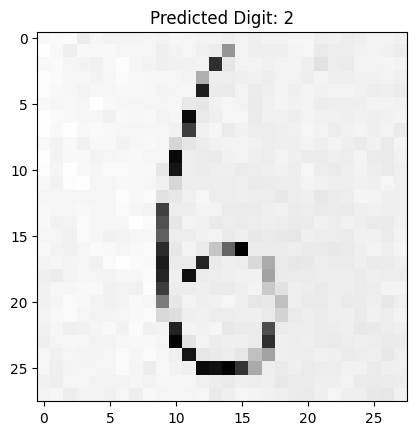

1/1 [==============================] - 0s 25ms/step


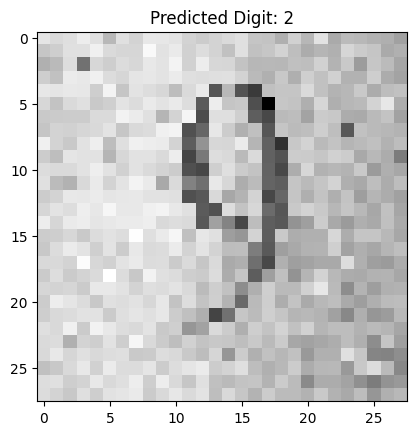

1/1 [==============================] - 0s 30ms/step


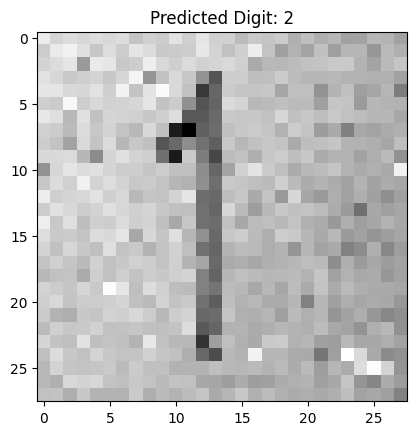

1/1 [==============================] - 0s 26ms/step


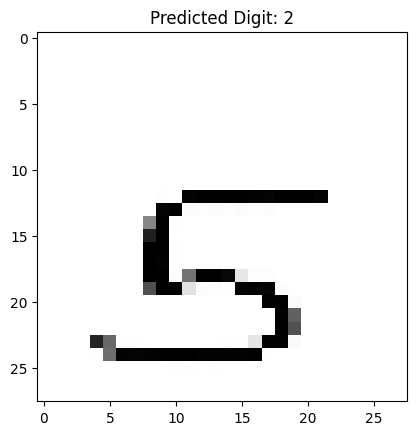

1/1 [==============================] - 0s 25ms/step


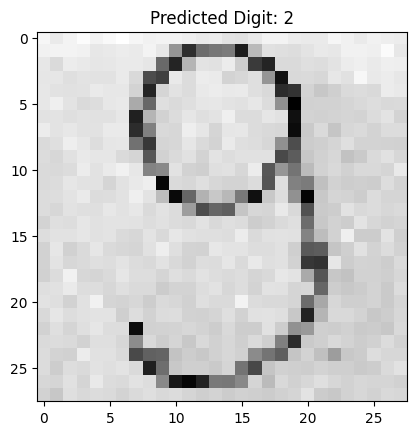

1/1 [==============================] - 0s 39ms/step


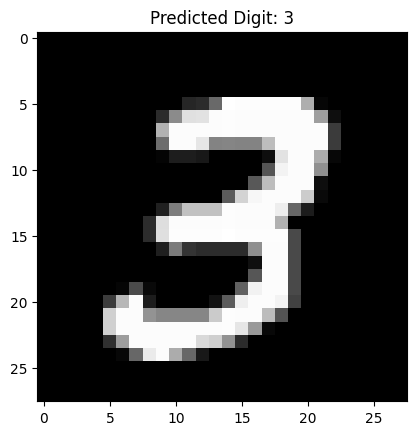

1/1 [==============================] - 0s 27ms/step


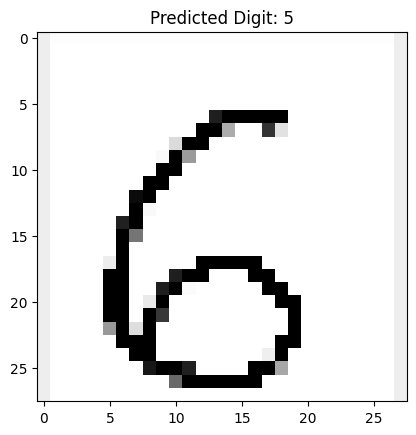

313/313 [==============================] - 2s 5ms/step


In [17]:
# Process and predict each image in the list
image_predictions = []
for image_path in image_paths:
    prediction = process_and_predict_image(image_path, loaded_model)
    image_predictions.append((image_path, prediction))


In [28]:
image_predictions

[('images/129d4ad88bd85b3f114b158df63ffb0b_t.jpeg', 2),
 ('images/CF1ze.jpg', 2),
 ('images/esy-015379139.jpg', 2),
 ('images/esy-015380853.jpg', 2),
 ('images/images.png', 2),
 ('images/j87yh.jpg', 2),
 ('images/MNIST_digit.png', 3),
 ('images/unnamed.png', 5)]

In [ ]:
# Predict and evaluate on the X_test dataset 
X_test = X_test / 255.0  # Normalize pixel values
test_predictions = loaded_model.predict(X_test)
test_pred_labels = [np.argmax(prediction) for prediction in test_predictions]

In [18]:
test_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9789


[0.10679537057876587, 0.9789000153541565]

- Plot training and validation loss and accuracy

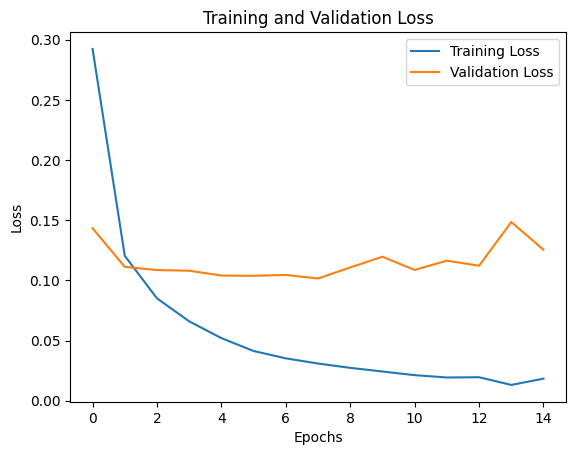

In [21]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

- Plot training and validation accuracy

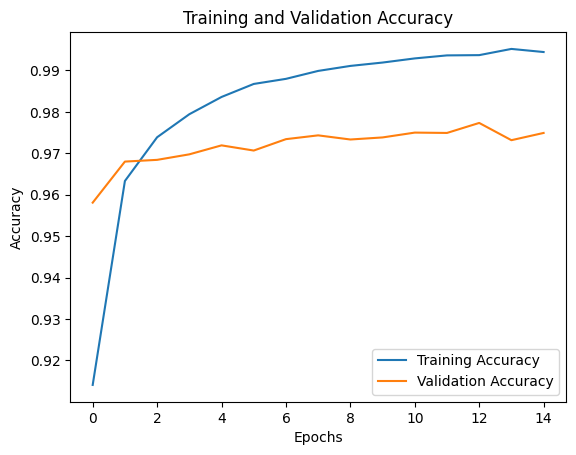

In [22]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()